In [1]:
import pandas as pd
import numpy as np

# scrape all the tables from the web
all_df_lists = []
for year in range(2014, 2020):
    url='http://www.svpl.org.uk/index.php/{}-league-tables?year={}-league-tables'.format(year, year)
    all_df_lists.append(pd.read_html(url))

In [2]:
all_df_lists

[[   Rank            Teams  Played  Points  Won  Lost  GD    PF    PA   PD  \
  0     1  Kinver Con Club      14      24   12     2  50  1135   795  340   
  1     2           Nomads      14      20   10     4  20  1063   832  231   
  2     3        Royal Oak      14      16    8     6  10  1052   965   87   
  3     4       K.C.R.F.C.      14      14    7     7   0   968   991  -23   
  4     5   Bewdley Royals      14      12    6     8  -6   958   986  -28   
  5     6           Plough      14      10    5     9 -22   866  1073 -207   
  6     7       Gaters 'A'      14       8    4    10 -20   891  1029 -138   
  7     8             Oaks      14       8    4    10 -32   818  1080 -262   
  
    Current form  
  0        WLWWW  
  1        LWWWW  
  2        WWLWW  
  3        LLLWL  
  4        WLLLL  
  5        WWWLL  
  6        LWWLL  
  7        LLLLW  ,
     Rank              Teams  Played  Points  Won  Lost  GD    PF    PA   PD  \
  0     1          '41' Club      16      2

In [3]:
## not all tables have all desired columns, so fill with NaN
# also add columns for Year and table number within year

desired_columns = ['Year', 'TblNbr', 'Rank', 'Teams', 'Played', 'Points', 'GD', 'PD']
for year, df_list in zip(range(2014, 2020), all_df_lists):
    for i, df in enumerate(df_list):
        df['Year'] = year
        df['TblNbr'] = i
        for col in desired_columns:
            if not col in df.columns:
                df[col] = np.nan
                print("added column {} to table {} of year {}".format(col, i, year))
desired_columns

added column PD to table 0 of year 2016
added column PD to table 1 of year 2016


['Year', 'TblNbr', 'Rank', 'Teams', 'Played', 'Points', 'GD', 'PD']

In [4]:
df_list

[   Rank            Teams  Played  Points  Won  Lost  GF  GA  GD    PF    PA  \
 0     1  Kinver Con Club      16      30   15     1  88  24  64  1291   779   
 1     2           Nomads      16      24   12     4  74  38  36  1232   950   
 2     3          Top Pub      16      22   11     5  60  46  14   993   911   
 3     4           Plough      16      20   10     6  59  52   7  1138  1106   
 4     5   Alveley Royals      16      16    8     8  52  57  -5   971  1068   
 5     6        Footloose      16      12    6    10  50  62 -12  1047  1133   
 6     7       Gaters 'B'      16      10    5    11  36  70 -34   893  1038   
 7     8             Oaks      16       8    4    12  48  63 -15  1009  1137   
 8     9       Gaters 'A'      16       2    1    15  27  82 -55   787  1239   
 
     PD Current form  Year  TblNbr  
 0  512        WWWWW  2019       0  
 1  282        WWWWL  2019       0  
 2   82        WWWLW  2019       0  
 3   32        WWLWW  2019       0  
 4  -97      

In [5]:
# combine the tables, keep only the desired columns
df_combined = pd.concat([df[desired_columns] for df_list in all_df_lists for df in df_list], ignore_index=True)
df_combined

,Year,TblNbr,Rank,Teams,Played,Points,GD,PD
0,2014,0,1,Kinver Con Club,14,24,50,340.0
1,2014,0,2,Nomads,14,20,20,231.0
2,2014,0,3,Royal Oak,14,16,10,87.0
3,2014,0,4,K.C.R.F.C.,14,14,0,-23.0
4,2014,0,5,Bewdley Royals,14,12,-6,-28.0
...,...,...,...,...,...,...,...,...
93,2019,1,4,Claverley Lions,14,16,12,-15.0
94,2019,1,5,Lakes 'C',14,14,-4,4.0
95,2019,1,6,Bewdley Institute,14,10,-14,-98.0
96,2019,1,7,Bewdley PC B,14,10,-14,-98.0


In [6]:
#teams=['Kinver Con Club','Nomads','Top Pub','Plough','Alveley Royals','Footloose',"Gaters 'A'",'Alveley Oaks']
final=df_combined[(df_combined.values == 'Alveley Oaks')|(df_combined.values == 'Kinver Con Club')|(df_combined.values == 'Nomads')|(df_combined.values == 'Kinver Con Club')|(df_combined.values == 'Top Pub')|(df_combined.values == 'Plough')|(df_combined.values == 'Alveley Royals')|(df_combined.values == 'Footloose')|(df_combined.values == "Gaters 'A'")|(df_combined.values == 'Alveley Oaks')]
#df[(df.values  == "banana")|(df.values  == "apple" ) ]
final=final[['Year','Teams','Points']]
merged=final.pivot_table(index='Year', columns='Teams',values='Points').reset_index().rename_axis(None, axis=1)
merged.Year = pd.to_datetime(merged['Year'], format='%Y')
merged.set_index(['Year'],inplace=True)
merged

,Alveley Royals,Footloose,Gaters 'A',Kinver Con Club,Nomads,Plough,Top Pub
Year,,,,,,,
2014-01-01,NaN,22.0,8.0,24.0,20.0,10.0,24.0
2015-01-01,NaN,22.0,20.0,16.0,18.0,8.0,10.0
2016-01-01,10.0,8.0,22.0,22.0,18.0,26.0,22.0
2017-01-01,12.0,22.0,10.0,26.0,24.0,14.0,12.0
2018-01-01,14.0,8.0,8.0,26.0,22.0,16.0,14.0
2019-01-01,16.0,12.0,2.0,30.0,24.0,20.0,22.0


<IPython.core.display.Javascript object>


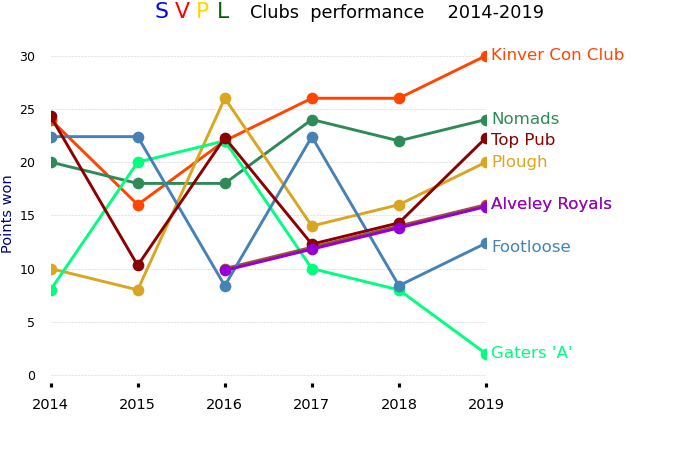

In [10]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans
from matplotlib.ticker import FixedLocator, FormatStrFormatter
import matplotlib.dates as mdates
#%matplotlib notebook
plt.style.use('seaborn-poster')

fig,ax = plt.subplots(figsize=(9,6), facecolor='w', edgecolor='blue')

my_colors=['orangered','seagreen', 'goldenrod', 'springgreen', 'sienna']

ax.set_ylim(-0.7, 31)  

# set every year
years = mdates.YearLocator()   
years_fmt = mdates.DateFormatter('%Y')

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)


ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


#title

fig.text(0.24, 0.95, "S", ha="center", va="bottom", size=21,color="blue")
fig.text(0.27, 0.95, "V", ha="center", va="bottom", size=21,color="red")
fig.text(0.30, 0.95, "P", ha="center", va="bottom", size=21,color="gold")
fig.text(0.33, 0.95, "L", ha="center", va="bottom", size=21,color="darkgreen")
fig.text(0.50, 0.95, "Clubs  performance", ha="center", va="bottom", size=17,color="black")
fig.text(0.73, 0.95," 2014-2019", ha="center", va="bottom", size=17,color="black")

x_axis = ax.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
ax.set_ylabel('Points won', color='darkblue',  fontdict={'fontsize': 14, 'fontweight': 'medium'})



ax.tick_params(axis='y', which='major', labelsize=12, bottom=False, top=False, labelbottom=False,
               left=False, right=False, labelright=False)
ax.tick_params(axis='x', which='major', labelcolor='black', width=3,color='black', labelsize=14, bottom=True, top=False, labelbottom=True, labelrotation=90,
               left=False, right=False, labelright=False)

ax=merged.plot(y=['Kinver Con Club', 'Nomads', 'Plough', "Gaters 'A'", 'Alveley Royals'],marker='o',figsize=(9,6),legend=None, color=my_colors, ax=ax)

selectcols=merged[['Kinver Con Club', 'Nomads', 'Plough', "Gaters 'A'", 'Alveley Royals']]

for line, name in zip(ax.lines, selectcols.columns):

    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(0.998,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=16, va="center")

merged.plot(y='Footloose', marker='o', figsize=(9,6), legend=None, color= 'steelblue', ax=ax, alpha=1,
                    transform=mtrans.offset_copy(ax.transData, fig=fig, x=0.0, y=4, units='points'))   

y = 12
ax.annotate('Footloose', xy=(0.998,y), xytext=(6,0), color='steelblue', 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=16, va="center")

merged.plot(y=['Top Pub'], marker='o', figsize=(9,6), legend=None, color= 'darkred', ax=ax, alpha=1,
                    transform=mtrans.offset_copy(ax.transData, fig=fig, x=0.0, y=3*(1), units='points'))      
y = 22
ax.annotate('Top Pub', xy=(0.998,y), xytext=(6,0), color='darkred', 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=16, va="center")

y = 16
merged.plot(y='Alveley Royals', marker='o', figsize=(9,6), legend=None, color= 'darkviolet', ax=ax, alpha=1,
                    transform=mtrans.offset_copy(ax.transData, fig=fig, x=0.0, y=-1.8, units='points'))  
ax.annotate('Alveley Royals', xy=(0.998,y), xytext=(6,0), color='darkviolet', 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=16, va="center")


# Adjusting the size of the plot to fit the team labels

fig.subplots_adjust(left=.075, right=.72, bottom=0.15, top=.90)

# Horizontal grid lines
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))
ax.grid(True, 'major', 'y', ls='--', lw=.6, c='darkgray', alpha=.5)

#plt.savefig('SVPLclubsperformancebest.pdf')
plt.show()
